# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# iNITIALIZE LIST TO HOLD THE LATITUDE & LONGITUDE & CITIES

Cities = []
Latitude_long = []


# Create a set of random lat and lng combinations
latitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
Latitude_long = zip(latitude, longs)

# Identify nearest city for each lat, lng combination
for Latitude_long in Latitude_long:
    city = citipy.nearest_city(Latitude_long[0], Latitude_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in Cities:
        Cities.append(city)

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q=" + Cities[0]
response = requests.get(query_url)
response = response.json()
print(json.dumps(response, indent = 4))



{
    "coord": {
        "lon": 77.24,
        "lat": 38.42
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 272.473,
        "pressure": 891.11,
        "humidity": 76,
        "temp_min": 272.473,
        "temp_max": 272.473,
        "sea_level": 1033.67,
        "grnd_level": 891.11
    },
    "wind": {
        "speed": 1.16,
        "deg": 232.5
    },
    "clouds": {
        "all": 20
    },
    "dt": 1541955150,
    "sys": {
        "message": 0.003,
        "country": "CN",
        "sunrise": 1541899714,
        "sunset": 1541936470
    },
    "id": 1280037,
    "name": "Shache",
    "cod": 200
}


In [6]:
#initialize variables
Latitude = []
Longitude = []
Weather = []
Date = []
Humidity = []
Cloudiness = []
Country = []
Speed = []
city_list_with_weather = []
city_list_without_weather = []

#i = 0
#j = 1
for city in Cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&units=metric&q=" + city
    response = requests.get(query_url)
    response = response.json()
    try:
        Weather_cloudiness = response["clouds"]["all"]
        Weather_country = response["sys"]["country"]
        Weather_date = response["dt"]
        Weather_humidity = response['main']['humidity']
        Weather_lat = response['coord']['lat']
        Weather_lng = response['coord']['lon']
        Weather_temp = response['main']['temp_max']
        Weather_Speed = response['wind']['speed']
        Weather_city = city
        Cloudiness.append( Weather_cloudiness)
        Country.append(Weather_country)
        Date.append(Weather_date)
        Humidity.append(Weather_humidity)
        Latitude.append(Weather_lat)
        Longitude.append(Weather_lng)
        Weather.append(Weather_temp)
        Speed.append(Weather_Speed)
        print('Adding %s to "weather" list ...'% city)
        city_list_with_weather.append(Weather_city)
    except KeyError:
        print('Adding %s to "no weather list" ...' % city) 
        city_list_without_weather.append(city)



Adding rikitea to "weather" list ...
Adding mori to "weather" list ...
Adding mahebourg to "weather" list ...
Adding belushya guba to "no weather list" ...
Adding mys shmidta to "no weather list" ...
Adding kazachinskoye to "weather" list ...
Adding aklavik to "weather" list ...
Adding kralendijk to "weather" list ...
Adding port lincoln to "weather" list ...
Adding albany to "weather" list ...
Adding abha to "weather" list ...
Adding karratha to "weather" list ...
Adding busselton to "weather" list ...
Adding nelson bay to "weather" list ...
Adding arraial do cabo to "weather" list ...
Adding hilo to "weather" list ...
Adding tuktoyaktuk to "weather" list ...
Adding avarua to "weather" list ...
Adding nyurba to "weather" list ...
Adding itaituba to "weather" list ...
Adding camacha to "weather" list ...
Adding georgetown to "weather" list ...
Adding punta arenas to "weather" list ...
Adding cape town to "weather" list ...
Adding lensk to "weather" list ...
Adding saint-philippe to "we

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:



weather_data = {"City": city, "Cloudiness": Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity,
               "Lat": Latitude, "Lng": Longitude, "Max Temp": Weather, "Wind Speed": Speed}
weather_file = pd.DataFrame(weather_data)
weather_file.count()
weather_file.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tiksi,76,PF,1541954988,100,-23.12,-134.97,21.22,2.61
1,tiksi,92,JP,1541954698,100,34.86,137.94,14.22,1.56
2,tiksi,40,MU,1541952000,78,-20.41,57.70,26.00,4.10
3,tiksi,32,RU,1541954700,87,57.69,93.28,-25.76,2.31
4,tiksi,90,CA,1541952000,85,68.22,-135.01,-12.00,3.60


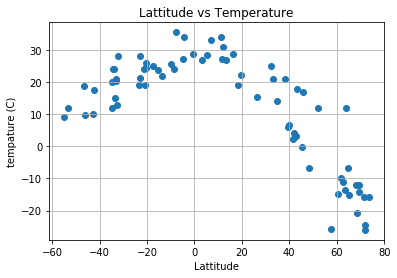

In [8]:
plt.scatter(weather_file['Lat'], weather_file['Max Temp'], marker = 'o')
plt.title('Lattitude vs Temperature')
plt.ylabel("tempature (C)")
plt.xlabel('Lattitude')
plt.grid()
plt.savefig("../Images/LatTemp.png")
plt.show()

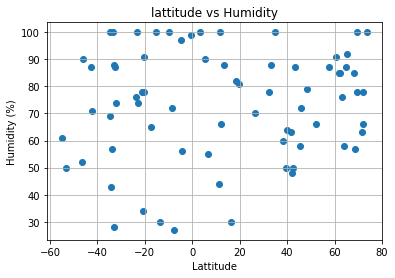

In [10]:
plt.scatter(weather_file['Lat'], weather_file['Humidity'], marker = 'o')
plt.title('lattitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Lattitude')
plt.grid()
plt.savefig("../Images/LatHumidity.png")
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

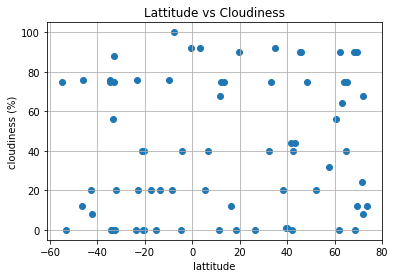

In [11]:
plt.scatter(weather_file['Lat'], weather_file['Cloudiness'], marker = 'o')
plt.title("Lattitude vs Cloudiness")
plt.ylabel('cloudiness (%)')
plt.xlabel('lattitude')
plt.grid()
plt.savefig("../Images/Latcloudiness.png")
plt.show()

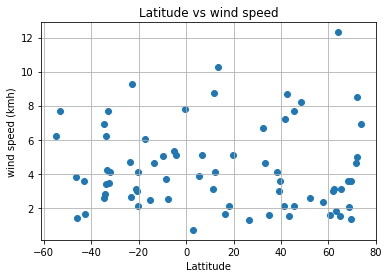

In [13]:
plt.scatter(weather_file['Lat'], weather_file['Wind Speed'], marker = 'o')
plt.title('Latitude vs wind speed')
plt.ylabel('wind speed (kmh)')
plt.xlabel('Lattitude')
plt.grid()
plt.savefig("../Images/Latwindspeed.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot